## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Loading dataset and performing preprocessing

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Collab/Churn_Modelling.csv")

In [ ]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

## Performing Exploratory Data Analysis and Data Visualization

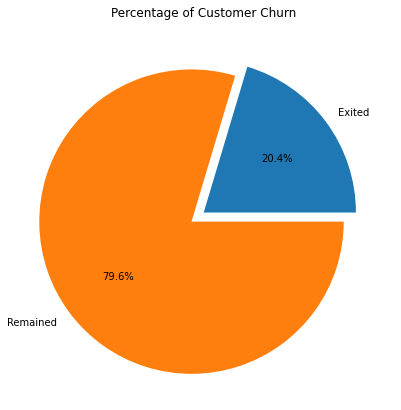

In [ ]:
plt.figure(figsize=(7,7))
plt.title("Percentage of Customer Churn")
plt.pie([(df['Exited']==1).sum(),(df['Exited']==0).sum()], explode=(0,0.1), autopct='%1.1f%%',
        labels=('Exited','Remained'))
plt.show()

- From the above pie chart we can conclude that 80% of customers are still retained by the bank, whereas 20% of the customers have exited/churned.

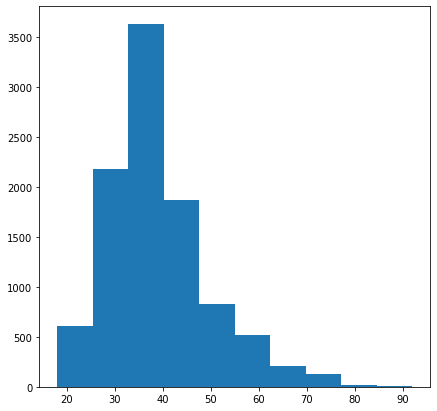

In [ ]:
plt.figure(figsize=(7,7))
plt.hist(x=df['Age'], bins=10)
plt.show()

- From the above histogram chart we can conclude that maximum of the customers are aged between 30 and 50

In [ ]:
df.Tenure.unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

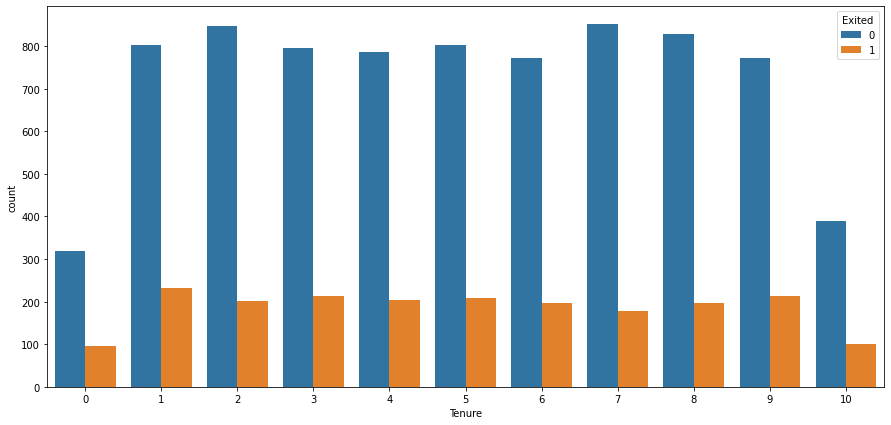

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x=df['Tenure'], hue=df['Exited'])

- From the above chart we can conclude that 90% customers have been with the bank for 2 to 9 year, whereas 10% of them make chunk of newest and oldest customers (0 and 10 years).
The distribution of retained and churned customers is normal for all tenures.  

In [ ]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

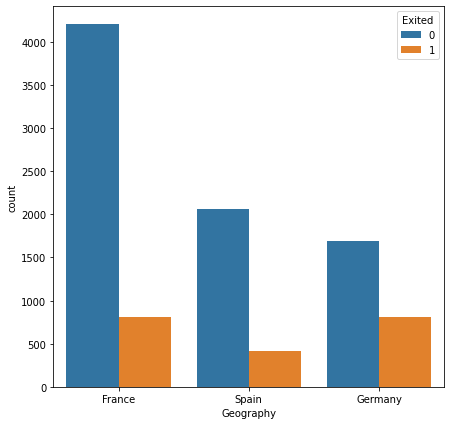

In [ ]:
plt.figure(figsize=(7,7))
sns.countplot(x=df['Geography'],hue=df['Exited'])

- From the above chart we can conclude that maximum no. of customers are from "France" followed by "Spain", whereas "Germany" has the least no. of customer and maximum no. of churned customers followed by "Spain".

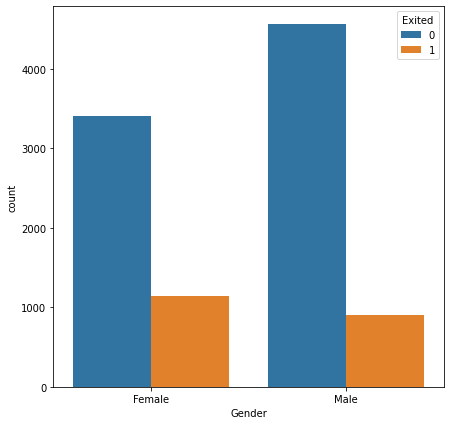

In [ ]:
plt.figure(figsize=(7,7))
sns.countplot(x=df['Gender'], hue=df['Exited'])

- From the above chart we can conclude that there are more "Male" customer compared to "Female", whereas "Female" customers are churning more compared to "Male" customers.

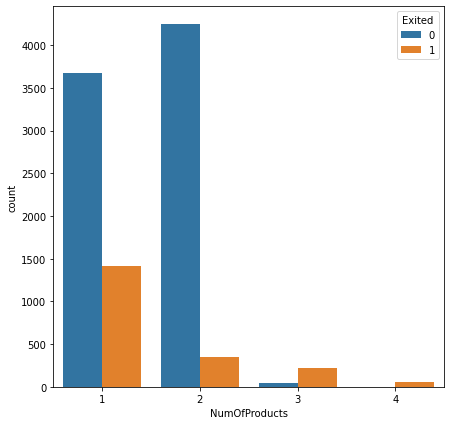

In [ ]:
plt.figure(figsize=(7,7))
sns.countplot(x=df['NumOfProducts'], hue=df['Exited'])

- From the above chart we can conclude that customer with 3 or 4 products are churning more compared to customers with 1 or 2 products.

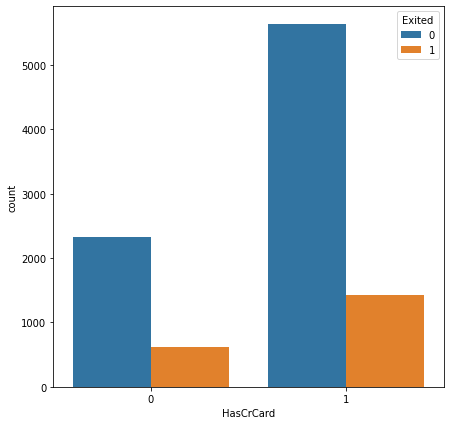

In [ ]:
plt.figure(figsize=(7,7))
sns.countplot(x=df['HasCrCard'], hue=df['Exited'])

- From the above chart we can conclude that customers without credit card facility are more likely to churn compared to customers having credit card.


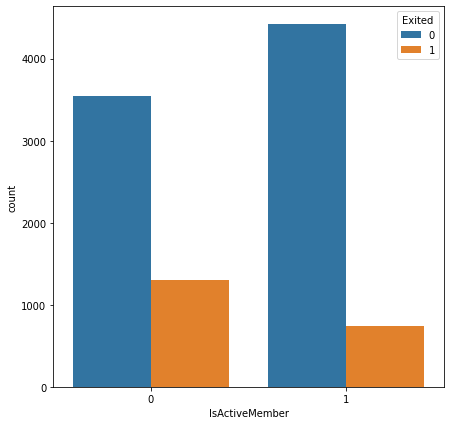

In [ ]:
plt.figure(figsize=(7,7))
sns.countplot(x=df['IsActiveMember'], hue=df['Exited'])

- From the above chart we can conclude that non active customers are churning more compared to active customers.

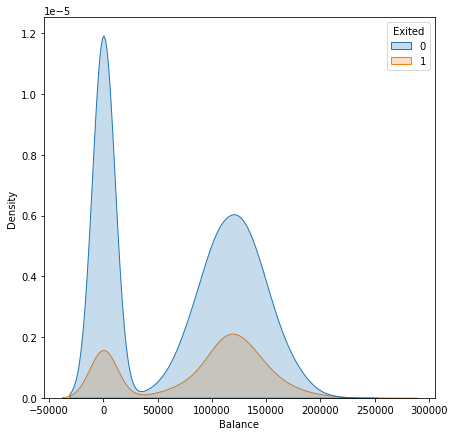

In [ ]:
plt.figure(figsize=(7,7))
sns.kdeplot(x=df['Balance'], hue=df['Exited'], legend=True, shade=True)

- From the above chart we can conclude that many customer have balance close to 0 or between 100k and 150k and more customers are churning in these balance segments.

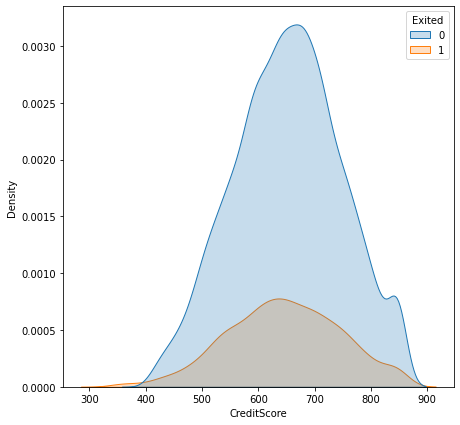

In [ ]:
plt.figure(figsize=(7,7))
sns.kdeplot(x=df['CreditScore'], hue=df['Exited'], legend=True, shade=True)

- From the above chart we can conclude that customers with credit score between 500 and 800 are more likely to churn.

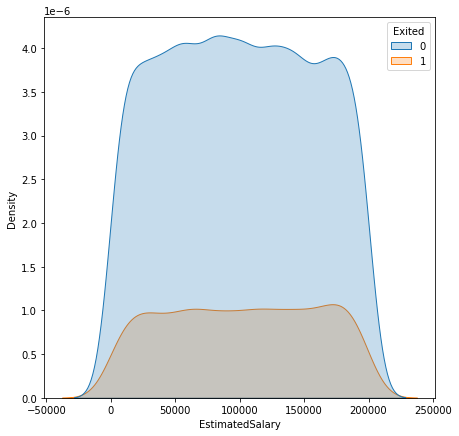

In [ ]:
plt.figure(figsize=(7,7))
sns.kdeplot(x=df['EstimatedSalary'], hue=df['Exited'], legend=True, shade=True)

- From the above chart we can conclude that estimated salary is not playing any vital role in the retaining or churning of customers.

## Performing One Hot Encoding on Categorical Data

In [ ]:
Geography = pd.get_dummies(df['Geography'], drop_first=True)

In [ ]:
Geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [ ]:
Gender = pd.get_dummies(df['Gender'], drop_first=True)
Gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


## Concatinating Encoded Data with the Dataset

In [ ]:
df.drop(['Geography','Gender'], axis=1, inplace=True)

In [ ]:
df.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0


In [ ]:
df = pd.concat([df,Geography,Gender],axis=1)
df.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0


## Checking Correlation

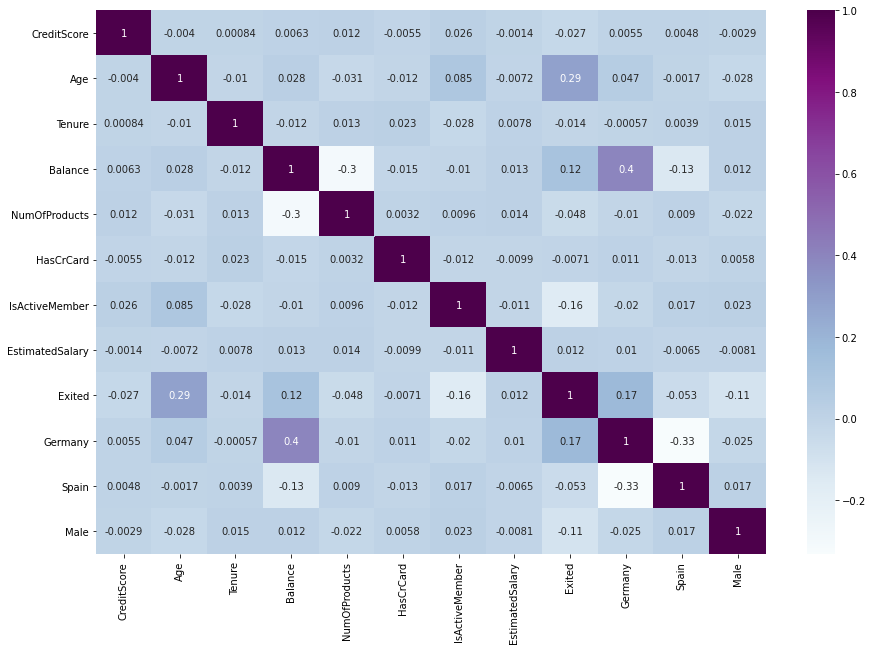

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='BuPu')

## Splitting Data

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [ ]:
X.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0


In [ ]:
y.head(2)

0    1
1    0
Name: Exited, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Scalling Data

In [ ]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Building Model

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(11, activation="relu", input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
    
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


## Training Model

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics='accuracy')

In [ ]:
trained_model = model.fit(X_train, y_train , batch_size=100, epochs = 50)

Epoch 1/50
80/80 [==============================] - 1s 1ms/step - loss: 0.8348 - accuracy: 0.3399
Epoch 2/50
80/80 [==============================] - 0s 1ms/step - loss: 0.6090 - accuracy: 0.7119
Epoch 3/50
80/80 [==============================] - 0s 1ms/step - loss: 0.5212 - accuracy: 0.7945
Epoch 4/50
80/80 [==============================] - 0s 1ms/step - loss: 0.4750 - accuracy: 0.8016
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4482 - accuracy: 0.8061
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4392 - accuracy: 0.8039
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.8174
Epoch 8/50
80/80 [==============================] - 0s 1ms/step - loss: 0.4142 - accuracy: 0.8226
Epoch 9/50
80/80 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.8297
Epoch 10/50
80/80 [==============================] - 0s 1ms/step - loss: 0.3965 - accuracy: 0.8357
Epoch 11/50
80/80 [

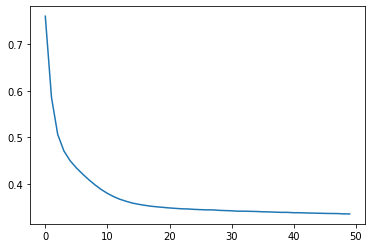

In [ ]:
plt.plot(trained_model.history["loss"])

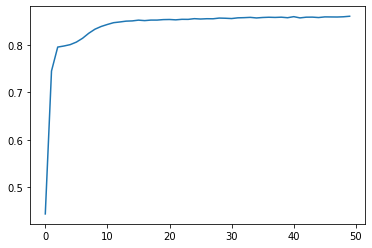

In [ ]:
plt.plot(trained_model.history["accuracy"])

## Testing Model

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = np.where(y_pred >= 0.5,1,0)

## Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1585
           1       0.78      0.45      0.57       415

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1531,   54],
       [ 227,  188]])